<div style="text-align:left;">
  <a href="https://code213.tech/" target="_blank">
    <img src="../images/code213.PNG" alt="QWorld">
  </a>
  <p><em>prepared by Latreche Sara</em></p>
</div>

# Understanding Logistic Regression: A Beginner-Friendly Guide


Welcome! In this notebook, we'll explore one of the most important models in machine learning — **Logistic Regression**.  
It's simple, powerful, and widely used for classification tasks like:
- Is this email spam or not?
- Will a customer buy the product?
- Will a patient develop a disease?

Let’s understand how it works and how to use it step-by-step.


##  What Is Logistic Regression?

Unlike linear regression that predicts *continuous values*, **logistic regression predicts probabilities**.  
It’s mainly used for **binary classification** problems (yes/no, 0/1, true/false).

The key idea is:  
It uses a **sigmoid (logistic) function** to convert predictions into probabilities.


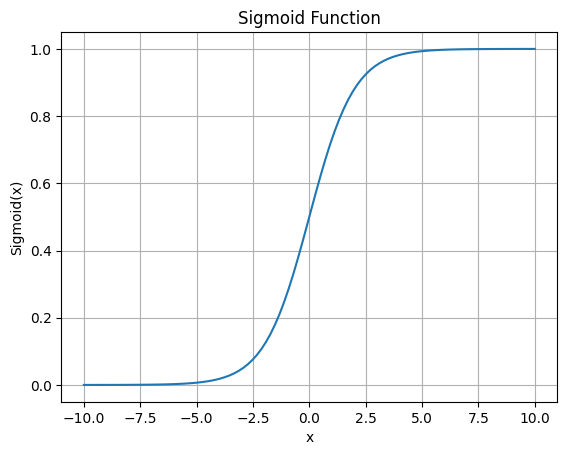

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)

plt.plot(x_vals, y_vals)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.show()


In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# View dataset
X.head



<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

Accuracy: 0.956140350877193


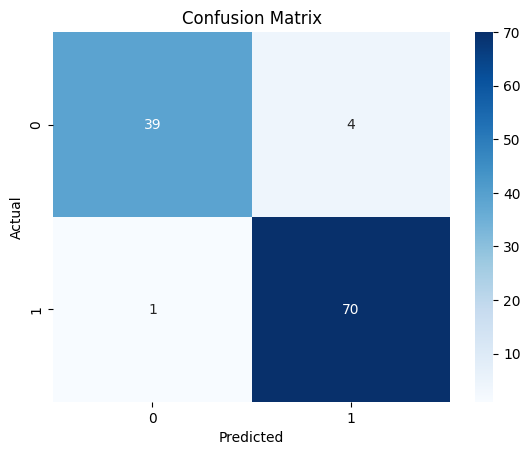

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


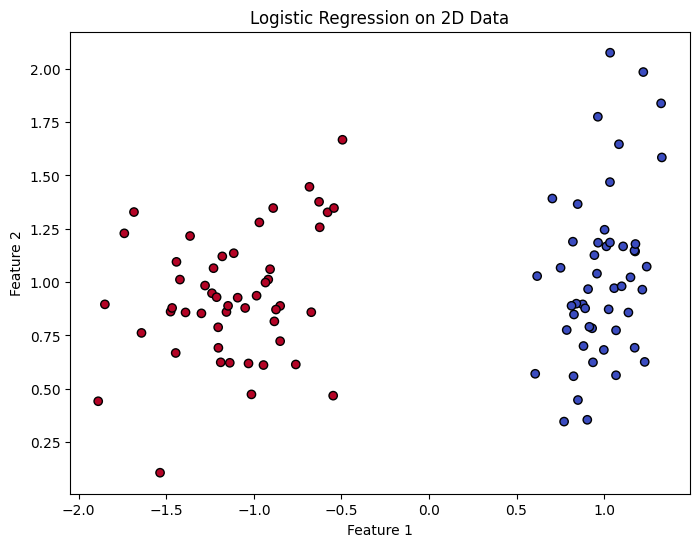

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X_vis, y_vis = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    n_clusters_per_class=1, n_samples=100, random_state=1)

model_vis = LogisticRegression()
model_vis.fit(X_vis, y_vis)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='coolwarm', edgecolors='k')
plt.title("Logistic Regression on 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [9]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


F1-Score: 0.9655172413793104


### F1-Score:
The **F1-score** is the harmonic mean of **precision** and **recall**. It's useful when you need to balance both precision and recall. The F1-score ranges from 0 to 1, where 1 is the best possible score.

#### Formula:
The formula for the F1-score is:

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

You can easily calculate the F1-score using `classification_report` or directly with `f1_score`:




In [10]:
from sklearn.metrics import roc_auc_score

# Get the predicted probabilities for class 1 (positive class)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)


ROC-AUC: 0.9977071732721913


### ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):
The ROC-AUC score gives an aggregate measure of a classifier's performance across all possible classification thresholds. It evaluates how well the model distinguishes between classes. A higher AUC means a better model.

The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate (1 - Specificity) for different threshold values. The AUC (Area Under the Curve) score represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

AUC = 1 means perfect classification.

AUC = 0.5 means the model is no better than random guessing.

AUC < 0.5 suggests the model is worse than random guessing.

Here’s how you can calculate the ROC-AUC score:

### Plotting the ROC Curve:
You can also plot the ROC curve to visualize how the classifier performs across different thresholds:

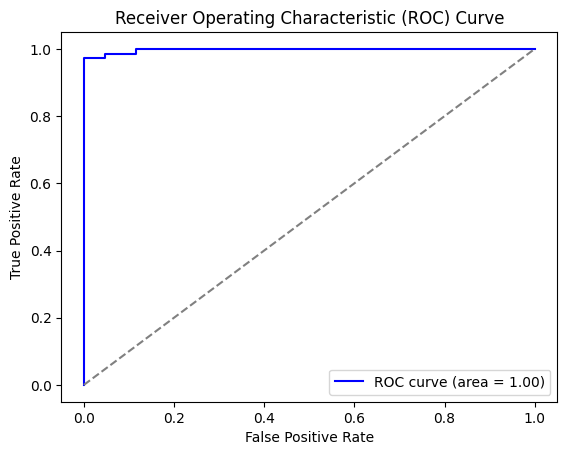

In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Precision-Recall Curve and AUC:
For imbalanced datasets, the Precision-Recall AUC might be more informative than the ROC-AUC. Precision-Recall curves plot precision versus recall, and the area under the curve (PR-AUC) summarizes the overall performance.

Here’s how you can plot the Precision-Recall curve and calculate its AUC:

Precision-Recall AUC: 0.9986732187872311


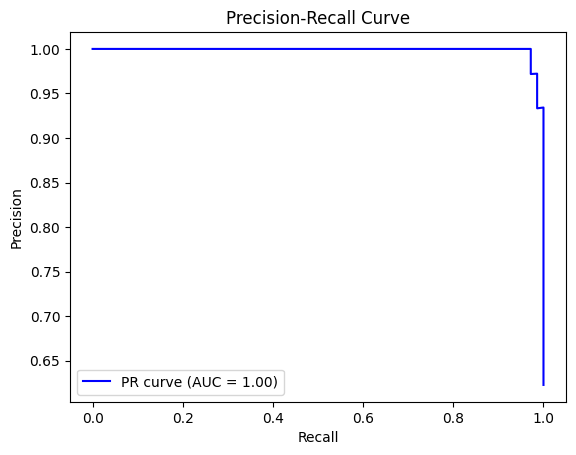

In [12]:
from sklearn.metrics import precision_recall_curve, auc

# Get precision, recall, and thresholds
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Calculate the Precision-Recall AUC
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

# Plot the Precision-Recall curve
plt.plot(recall, precision, color='b', label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


## Summary

- Logistic regression is a **powerful classification model**.
- It predicts **probabilities using the sigmoid function**.
- With **Scikit-learn**, it's easy to train and evaluate the model.
- We visualized the model and explored real-world data.

Hope you found this guide friendly and useful! 🚀
